<a href="https://colab.research.google.com/github/Bornitaadhikari/My-Projects/blob/main/ML_with_Bigdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load dataset
original_dataset = pd.read_csv("/content/LearningData.csv", encoding= 'unicode_escape')
# some cleaning
# columns_to_discard = ['id']
# original_dataset.drop(columns_to_discard, axis = 1, inplace = True)
print(original_dataset.shape)
original_dataset.head()

(29228, 810)


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,disability,dataplus_1,...,wiki_40,page_40,questionnaire_40,quiz_40,repeated activity_40,resource_40,shared subpage_40,subpage_40,url_40,label
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,N,0,...,0,0,0,0,1,0,0,1,0,Success
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,N,0,...,0,0,0,0,0,0,0,1,0,Success
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,Y,0,...,0,0,0,0,0,0,1,0,1,Failure
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,N,0,...,1,0,0,0,0,0,0,1,0,Success
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,N,0,...,1,0,0,0,0,0,0,1,0,Success


In [ ]:
original_dataset['label'].unique()

array(['Success', 'Failure'], dtype=object)

In [ ]:
# shuffle the dataset
original_dataset = original_dataset.sample(frac=1).reset_index(drop=True)
print(original_dataset.shape)
original_dataset.head()

In [ ]:
target_column = 'label'

In [ ]:
original_dataset.describe()

,id_student,dataplus_1,dualpane_1,external quiz_1,folder_1,forum_1,glossary_1,homepage_1,hrml activity_1,collaborate_1,...,elluminate_40,wiki_40,page_40,questionnaire_40,quiz_40,repeated activity_40,resource_40,shared subpage_40,subpage_40,url_40
count,2.922800e+04,29228.000000,29228.000000,29228.000000,29228.000000,29228.000000,29228.000000,29228.0,29228.000000,29228.000000,...,29228.000000,29228.000000,29228.000000,29228.000000,29228.000000,29228.000000,29228.000000,29228.000000,29228.000000,29228.000000
mean,7.083367e+05,0.000855,5.969344,1.027166,0.000753,0.037875,0.121767,0.0,17.052450,0.215684,...,0.099733,0.097509,0.090940,0.089914,0.085774,0.080437,0.036061,0.096414,0.903586,0.473724
std,5.517362e+05,0.032557,10.481063,2.681011,0.046052,0.468572,0.653759,0.0,39.314996,1.997812,...,0.299649,0.296655,0.287529,0.286063,0.280035,0.271973,0.186446,0.295164,0.295164,0.499318
min,6.516000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.075768e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,5.898280e+05,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,6.437068e+05,0.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.0,19.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,2.698588e+06,2.000000,215.000000,187.000000,4.000000,25.000000,21.000000,0.0,1266.000000,99.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
original_dataset.value_counts()

In [ ]:

original_dataset.dtypes

code_module          object
code_presentation    object
id_student            int64
gender               object
region               object
                      ...  
resource_40           int64
shared subpage_40     int64
subpage_40            int64
url_40                int64
label                object
Length: 810, dtype: object

In [ ]:
original_dataset.isnull().sum()

code_module          0
code_presentation    0
id_student           0
gender               0
region               0
                    ..
resource_40          0
shared subpage_40    0
subpage_40           0
url_40               0
label                0
Length: 810, dtype: int64

In [ ]:
# showing the missing value percentage
original_dataset.isnull().sum() / len(original_dataset) * 100

code_module          0.0
code_presentation    0.0
id_student           0.0
gender               0.0
region               0.0
                    ... 
resource_40          0.0
shared subpage_40    0.0
subpage_40           0.0
url_40               0.0
label                0.0
Length: 810, dtype: float64

In [ ]:
encoding_columns = []
for col in original_dataset.columns:
    if original_dataset[col].dtype == 'object':
        encoding_columns.append(col)
encoding_columns

In [ ]:
encoding_columns = []
for col in original_dataset.columns:
    if original_dataset[col].dtype == 'object':
        encoding_columns.append(col)
encoding_columns

['code_module',
 'code_presentation',
 'gender',
 'region',
 'highest_education',
 'imd_band',
 'age_band',
 'disability',
 'label']

In [ ]:
""" here we are label encoding the columns which are not numerical """
from sklearn.preprocessing import LabelEncoder
def label_encode(dataset, list_of_columns):
    le = LabelEncoder()
    for i in list_of_columns:
        dataset[i] = le.fit_transform(dataset[i])
    return dataset
original_dataset = label_encode(original_dataset, encoding_columns)
original_dataset.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,disability,dataplus_1,...,wiki_40,page_40,questionnaire_40,quiz_40,repeated activity_40,resource_40,shared subpage_40,subpage_40,url_40,label
0,1,2,620018,0,7,0,3,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,3,3,564000,0,10,0,6,0,0,0,...,0,1,0,0,0,0,0,1,1,0
2,1,2,568370,0,11,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3,5,1,559979,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,4,2,561363,1,6,4,8,1,0,0,...,0,0,0,1,0,0,0,1,0,1


In [ ]:
original_dataset.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,disability,dataplus_1,...,wiki_40,page_40,questionnaire_40,quiz_40,repeated activity_40,resource_40,shared subpage_40,subpage_40,url_40,label
0,1,2,620018,0,7,0,3,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,3,3,564000,0,10,0,6,0,0,0,...,0,1,0,0,0,0,0,1,1,0
2,1,2,568370,0,11,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3,5,1,559979,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,4,2,561363,1,6,4,8,1,0,0,...,0,0,0,1,0,0,0,1,0,1


In [ ]:
# Scaling / Normalization / Standardization
columns = original_dataset.columns.tolist()
columns

In [ ]:
#Data Splitting
original_dataset[target_column].value_counts()

0    16870
1    12358
Name: label, dtype: int64

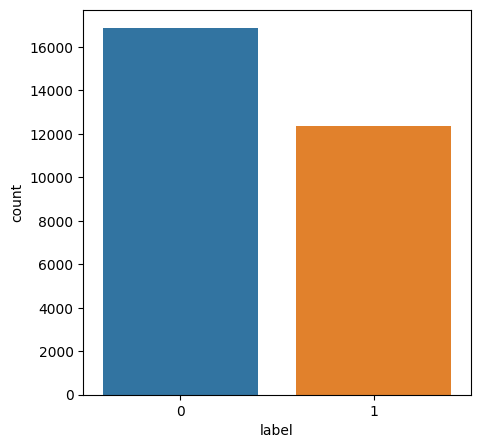

In [ ]:
plt.figure(figsize = (5, 5))
sns.countplot(x = target_column, data = original_dataset)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
# do a train test split of 0.8 and 0.2
train, test = train_test_split(original_dataset, test_size = 0.2, random_state = 42)

In [ ]:
label_column = target_column
xtrain, ytrain = train.drop(label_column, axis = 1), train[label_column]
xtest, ytest = test.drop(label_column, axis = 1), test[label_column]

KNN   (Model Building)

In [ ]:
# import Knn from sklearn
from sklearn.neighbors import KNeighborsClassifier
# create a Knn model
knn_model = KNeighborsClassifier()

from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(knn_model, param_grid, cv = 5)
knn_gscv.fit(xtrain, ytrain)
best_k = knn_gscv.best_params_['n_neighbors']

# knn_model = KNeighborsClassifier(n_neighbors = best_k)

param_grid = {'weights': ['uniform', 'distance']}
knn_gscv = GridSearchCV(knn_model, param_grid, cv = 5)
knn_gscv.fit(xtrain, ytrain)
best_weights = knn_gscv.best_params_['weights']

# knn_model = KNeighborsClassifier(n_neighbors = best_k, weights = best_weights)

param_grid = {'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
knn_gscv = GridSearchCV(knn_model, param_grid, cv = 5)
knn_gscv.fit(xtrain, ytrain)
best_algorithm = knn_gscv.best_params_['algorithm']

knn_model = KNeighborsClassifier(n_neighbors = best_k, weights = best_weights, algorithm = best_algorithm)


# fit the model
knn_model.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=1, weights='distance')

In [ ]:
y_pred_knn = knn_model.predict(xtest)

In [ ]:
# print the accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest, y_pred_knn))

0.6089633937735204


In [ ]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred_knn, zero_division = 0))

              precision    recall  f1-score   support

           0       0.63      0.79      0.70      3347
           1       0.57      0.37      0.45      2499

    accuracy                           0.61      5846
   macro avg       0.60      0.58      0.57      5846
weighted avg       0.60      0.61      0.59      5846



<Axes: >

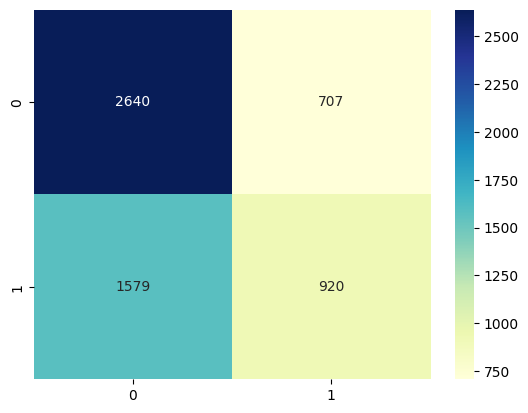

In [ ]:
# plot the confusion matrix with seaborn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred_knn)
sns.heatmap(cm, annot = True, fmt = 'd', cmap="YlGnBu")

Decision Tree

In [ ]:
# import decision tree from sklearn
from sklearn.tree import DecisionTreeClassifier
# create a decision tree model
dt_model = DecisionTreeClassifier()

# find out the best parameters for the decision tree
from sklearn.model_selection import GridSearchCV
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': np.arange(1, 25)}

dt_gscv = GridSearchCV(dt_model, param_grid, cv = 5)
dt_gscv.fit(xtrain, ytrain)
best_params = dt_gscv.best_params_

dt_model = DecisionTreeClassifier(criterion = best_params['criterion'], max_depth = best_params['max_depth'])

# fit the model
dt_model.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=1)

In [ ]:
# predict the test set
y_pred_dt = dt_model.predict(xtest)
# accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest, y_pred_dt))

0.8917208347588095


In [ ]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred_dt, zero_division = 0))

              precision    recall  f1-score   support

           0       1.00      0.81      0.90      3347
           1       0.80      1.00      0.89      2499

    accuracy                           0.89      5846
   macro avg       0.90      0.91      0.89      5846
weighted avg       0.91      0.89      0.89      5846



<Axes: >

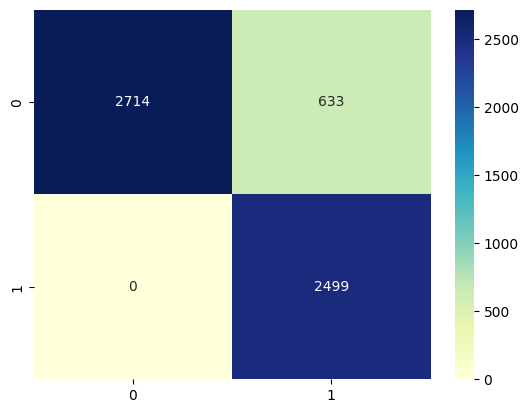

In [ ]:
# plot the confusion matrix with seaborn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred_dt)
sns.heatmap(cm, annot = True, fmt = 'd', cmap="YlGnBu")

Random Forest

In [ ]:
# import random forest from sklearn
from sklearn.ensemble import RandomForestClassifier
# create a random forest model
rf_model = RandomForestClassifier(max_depth=7, random_state=42)

# find out the best parameters for the random forest
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': np.arange(1, 25)}

rf_gscv = GridSearchCV(rf_model, param_grid, cv = 5)
rf_gscv.fit(xtrain, ytrain)
best_params = rf_gscv.best_params_

rf_model = RandomForestClassifier(n_estimators = best_params['n_estimators'], max_depth=7, random_state=42)

# fit the model
rf_model.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=7, n_estimators=17, random_state=42)

In [ ]:
# predict the test set
y_pred_rf = rf_model.predict(xtest)
accuracy_score(ytest, y_pred_rf)
# classification report
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred_rf, zero_division = 0))

              precision    recall  f1-score   support

           0       0.98      0.77      0.86      3347
           1       0.76      0.98      0.85      2499

    accuracy                           0.86      5846
   macro avg       0.87      0.87      0.86      5846
weighted avg       0.89      0.86      0.86      5846



<Axes: >

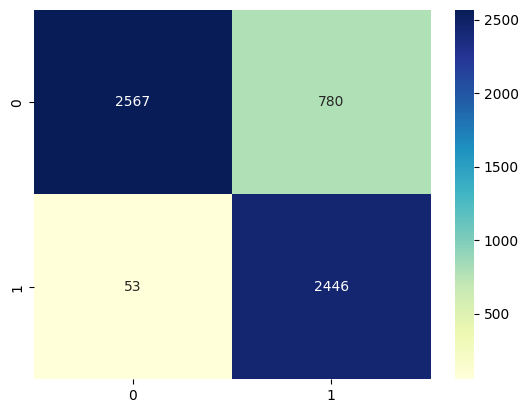

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred_rf)
sns.heatmap(cm, annot = True, fmt = 'd', cmap="YlGnBu")

Gaussian Naive Bayes

In [ ]:
# import gaussian naive bayes from sklearn
from sklearn.naive_bayes import GaussianNB
# create a gaussian naive bayes model
gnb_model = GaussianNB()
# fit the model
gnb_model.fit(xtrain, ytrain)

GaussianNB()

In [ ]:
# predict the test set
y_pred_gnb = gnb_model.predict(xtest)
accuracy_score(ytest, y_pred_gnb)

0.628634964078002

In [ ]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred_gnb, zero_division = 0))

              precision    recall  f1-score   support

           0       0.62      0.89      0.73      3347
           1       0.66      0.28      0.39      2499

    accuracy                           0.63      5846
   macro avg       0.64      0.58      0.56      5846
weighted avg       0.64      0.63      0.59      5846



<Axes: >

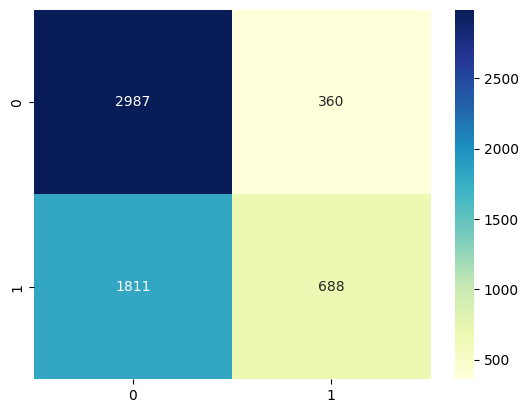

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred_gnb)
sns.heatmap(cm, annot = True, fmt = 'd', cmap="YlGnBu")

XGBoost

In [ ]:
!pip install xgboost

In [ ]:
# import xgboost
from xgboost import XGBClassifier
# create a xgboost model
xgb_model = XGBClassifier(booster = 'gbtree', max_depth = 3, learning_rate = 0.1, n_estimators = 100, objective = 'binary:logistic')
# fit the model
xgb_model.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
# predict
y_pred_xgb = xgb_model.predict(xtest)
accuracy_score(ytest, y_pred_xgb)

0.8932603489565515

In [ ]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred_xgb, zero_division = 0))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90      3347
           1       0.81      0.99      0.89      2499

    accuracy                           0.89      5846
   macro avg       0.90      0.91      0.89      5846
weighted avg       0.91      0.89      0.89      5846



<Axes: >

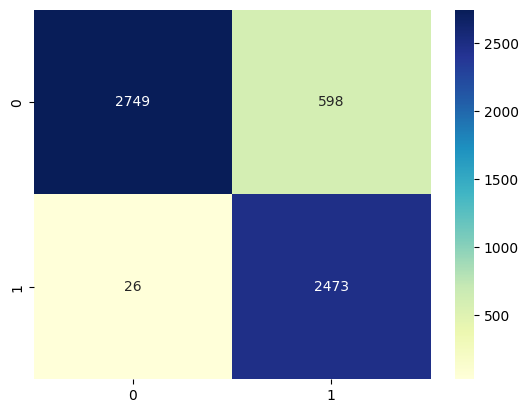

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred_xgb)
sns.heatmap(cm, annot = True, fmt = 'd', cmap="YlGnBu")

Adaboost Classifier

In [ ]:
# import ada boost classifier
from sklearn.ensemble import AdaBoostClassifier
# create a ada boost classifier model
ada_model = AdaBoostClassifier(
    learning_rate=0.1,
    n_estimators=100,
    random_state=42,
    algorithm='SAMME.R',
    )
# fit the model
ada_model.fit(xtrain, ytrain)

AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=42)

In [ ]:
# predict
y_pred_ada = ada_model.predict(xtest)
accuracy_score(ytest, y_pred_ada)

0.8918918918918919

In [ ]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred_ada, zero_division = 0))

              precision    recall  f1-score   support

           0       1.00      0.81      0.90      3347
           1       0.80      1.00      0.89      2499

    accuracy                           0.89      5846
   macro avg       0.90      0.91      0.89      5846
weighted avg       0.91      0.89      0.89      5846



<Axes: >

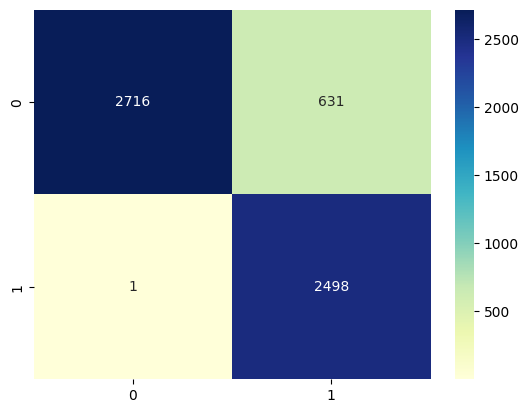

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred_ada)
sns.heatmap(cm, annot = True, fmt = 'd', cmap="YlGnBu")

Gradient Boosting

In [ ]:
# import gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
# create a gradient boosting classifier model
gbc_model = GradientBoostingClassifier()
# fit the model
gbc_model.fit(xtrain, ytrain)

GradientBoostingClassifier()

In [ ]:
y_pred_gbc = gbc_model.predict(xtest)
accuracy_score(ytest, y_pred_gbc)

0.8925761204242217

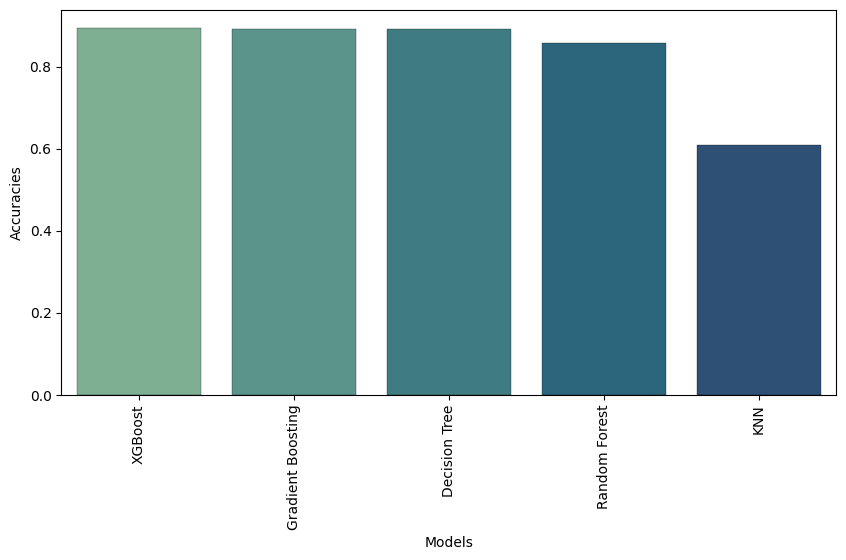

In [ ]:
# plot all the accuracy of the models in a bar plot in descending order
# import accuracy_score from sklearn
from sklearn.metrics import accuracy_score
# create a list of all the models
models = ['KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'Gradient Boosting']
# create a list of all the accuracies
accuracies = [ accuracy_score(ytest, y_pred_knn), accuracy_score(ytest, y_pred_dt), accuracy_score(ytest, y_pred_rf), accuracy_score(ytest, y_pred_xgb), accuracy_score(ytest, y_pred_gbc)]
# create a dataframe of the models and their accuracies
df = pd.DataFrame({'Models': models, 'Accuracies': accuracies})
# sort the dataframe in descending order
df = df.sort_values(by = 'Accuracies', ascending = False)
# plot the dataframe
plt.figure(figsize = (10, 5))
sns.barplot(x = 'Models', y = 'Accuracies', data = df, palette = 'crest', edgecolor = 'black', linewidth = 0.2)
plt.xticks(rotation = 90)
plt.show()